In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data collection
df1=pd.read_csv('2015.csv')
df2=pd.read_csv('2016.csv')
df3=pd.read_csv('2017.csv')

columns = ['Freedom', 'Generosity', 'Trust (Government Corruption)']
# Getting Training Data
X1 = df1[['Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']].values
X2 = df2[['Freedom', 'Generosity', 'Trust (Government Corruption)', 'Happiness Score']].values
X3 = df3[['Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Happiness.Score']].values

In [2]:
# Combining all records and removing rows that has zero values
x_all = np.concatenate((X1,X2,X3), axis=0, out=None)
x_all[x_all == 0] = np.nan
x_all = x_all[~np.isnan(x_all).any(axis=1)]

In [3]:
features = x_all[:,:x_all.shape[1] - 1]
labels = x_all[:,x_all.shape[1]-1]
XA_train, XA_test, yA_train, yA_test = train_test_split(features, labels, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(XA_train) 
XA_train_t = scalar.transform(XA_train)
XA_test_t = scalar.transform(XA_test)

In [5]:
regressor = LinearRegression()
regressor.fit(XA_train_t, yA_train)
yA_pred = regressor.predict(XA_test_t)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yA_test, yA_pred)))

Root Mean Squared Error: 1.0213416733477303


MLP Perceptron

In [6]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(48,),max_iter=2000)

In [7]:
mlp_reg.fit(XA_train_t, yA_train)
y1_pred = mlp_reg.predict(XA_test_t)
me = metrics.mean_squared_error(yA_test, y1_pred)
print('Root Mean Squared Error:', np.sqrt(me))

Root Mean Squared Error: 0.9793920346447701


Plotting

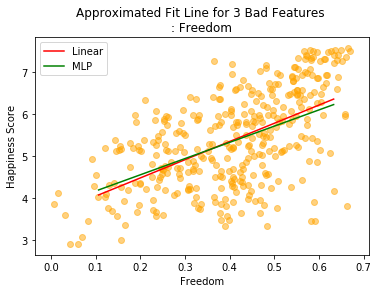

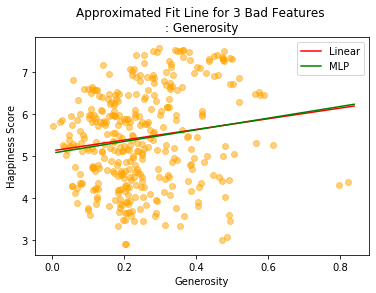

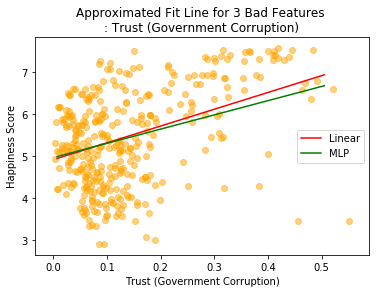

In [11]:
import matplotlib.pyplot as plt
from scipy import stats

for i in range(len(columns)):
    plt.scatter(XA_train[:,i], yA_train, alpha=0.5,c="#FFA500")
    s_t = np.column_stack((XA_test[:,i], yA_pred))
    s_t = s_t[s_t[:,0].argsort()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(s_t[:,0], s_t[:,1])
    plt.plot(s_t[:,0], intercept + slope*s_t[:,0], 'r', label='Linear')
    
    s_t = np.column_stack((XA_test[:,i], y1_pred))
    s_t = s_t[s_t[:,0].argsort()]
    slope, intercept, r_value, p_value, std_err = stats.linregress(s_t[:,0], s_t[:,1])
    plt.plot(s_t[:,0], intercept + slope*s_t[:,0], 'g', label='MLP')
    plt.gca().legend(('Linear','MLP'))
    plt.title("Approximated Fit Line for 3 Bad Features \n: " + columns[i])
    plt.xlabel(columns[i])
    plt.ylabel('Happiness Score')
    plt.show()

In [9]:
# Top Features:

def getTopFeatures(features):
    feature_dict = dict(zip(range(len(features)),features))
    sorted_features = sorted(feature_dict, key=feature_dict.get,reverse=True)
    return sorted_features[:]

# For Linear Regression
print("Top Features of the Linear Model:")
for i in getTopFeatures(regressor.coef_):
    print(columns[i])
# For MLP Regressor:
print("**************************************")
print("Top 10 Influential Nodes of the Hidden Layer for the MLP Model:")
print(getTopFeatures(mlp_reg.coefs_[1])[:10])


Top Features of the Linear Model:
Freedom
Trust (Government Corruption)
Generosity
**************************************
Top 10 Influential Nodes of the Hidden Layer for the MLP Model:
[18, 14, 31, 30, 15, 3, 42, 2, 19, 46]
